In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
import time

# Data

In [3]:
# Medical Insurance Cost dataset from https://www.kaggle.com/mirichoi0218/insurance
insurance = pd.read_csv('~/Desktop/Data_Science/insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.shape

(1338, 7)

## Features

### Age

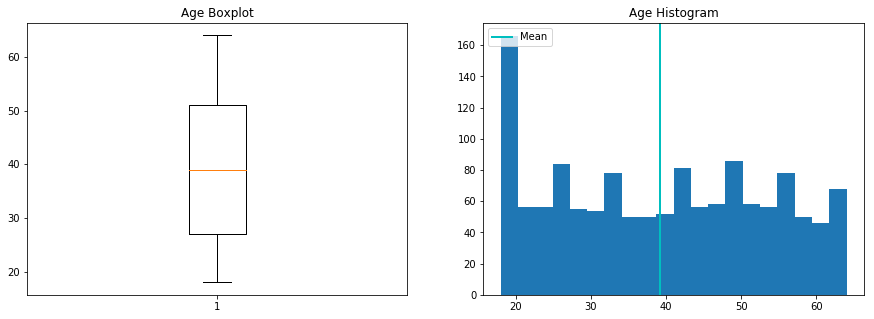

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['age'].dropna(how = 'any'))
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['age'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['age'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Age Histogram')

plt.show()

Ages range from 18 to 64 - adults before medicare age.  The average age is 39, which is below the mid-point of the age range, mostly due the greatest number of records for those under age 20.

### Sex/Gender

male      676
female    662
Name: sex, dtype: int64


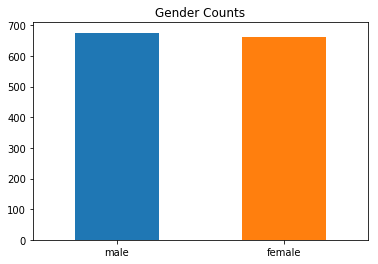

In [8]:
plt.title('Gender Counts')
pd.value_counts(insurance['sex']).plot.bar()
plt.xticks(rotation = 0)
print(insurance['sex'].value_counts())

Nearly equal number of male and female records, just 14 more male records than female.

In [9]:
#Convert to numeric
insurance['male_gender'] = 0
insurance.loc[insurance['sex'] == 'male', 'male_gender'] = 1

#Delete original 'sex' variable
insurance = insurance.drop('sex', 1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

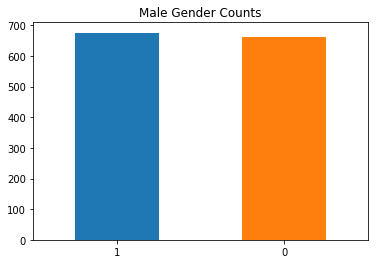

In [10]:
plt.title('Male Gender Counts')
pd.value_counts(insurance['male_gender']).plot.bar()
plt.xticks(rotation = 0)

### BMI/Obesity

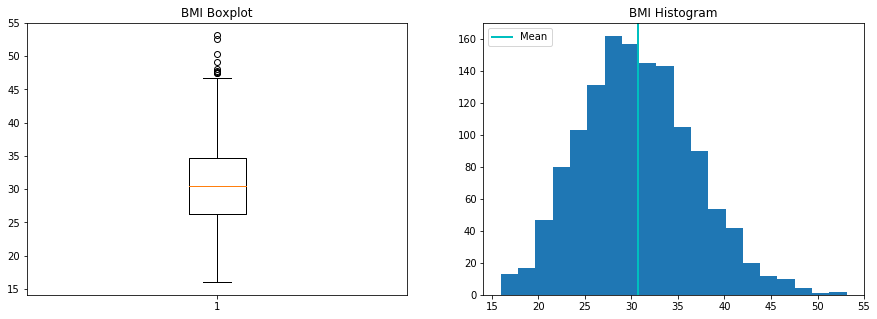

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['bmi'].dropna(how = 'any'))
plt.title('BMI Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['bmi'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['bmi'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('BMI Histogram')

plt.show()

Normal distribution of values, with a median of 31.7

According to Wikipedia, the body mass index (BMI) is a value derived from the weight and height of an individual. Commonly accepted BMI ranges are underweight: under 18.5 kg/m2, normal weight: 18.5 to 25, overweight: 25 to 30, obese: over 30.  This means that most of these records are for individuals considered to have an unhealthy weight for their height.

In [12]:
#Create new binary variable for Obesity
insurance['obesity'] = 0
insurance.loc[insurance['bmi'] > 30, 'obesity'] = 1

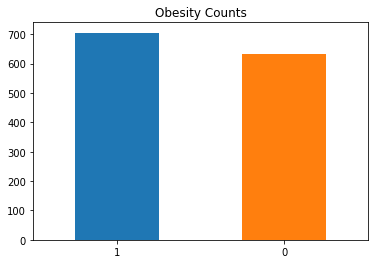

In [15]:
plt.title('Obesity Counts')
pd.value_counts(insurance['obesity']).plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Children

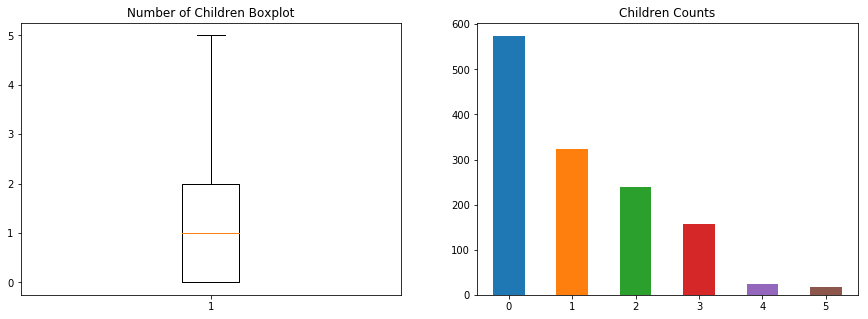

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['children'].dropna(how = 'any'))
plt.title('Number of Children Boxplot')

plt.subplot(1, 2, 2)
plt.title('Children Counts')
pd.value_counts(insurance['children']).plot.bar()
plt.xticks(rotation = 0)

plt.show()

More records are for individuals with children than not, but the most frequent number of children is none.<br>
Let's make a new boolean feature that captures whether the record is for a parent.

In [17]:
#create binary parent feature
insurance['parent'] = 0
insurance.loc[insurance['children'] > 0, 'parent'] = 1

(array([0, 1]), <a list of 2 Text xticklabel objects>)

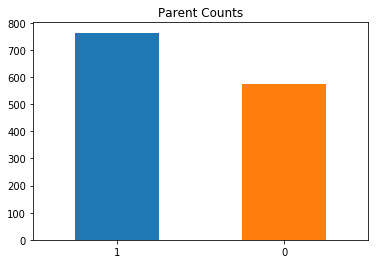

In [18]:
plt.title('Parent Counts')
pd.value_counts(insurance['parent']).plot.bar()
plt.xticks(rotation = 0)

### Smoker

yes     274
no     1064
dtype: int64


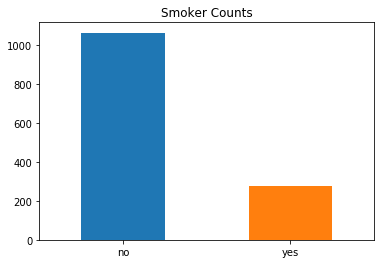

In [19]:
plt.title('Smoker Counts')
pd.value_counts(insurance['smoker']).plot.bar()
plt.xticks(rotation = 0)
print(pd.value_counts(insurance['smoker'].values, sort=False))

There are more non-smokers (1064) than smokers (274)

In [20]:
#Convert to numeric
insurance['smoke'] = 0
insurance.loc[insurance['smoker'] == 'yes', 'smoke'] = 1

#Delete original 'smoker' variable
insurance = insurance.drop('smoker', 1)

0    1064
1     274
dtype: int64


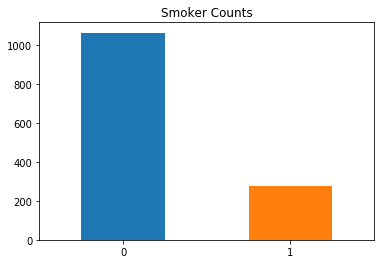

In [21]:
plt.title('Smoker Counts')
pd.value_counts(insurance['smoke']).plot.bar()
plt.xticks(rotation = 0)
print(pd.value_counts(insurance['smoke'].values, sort=False))

### Region

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

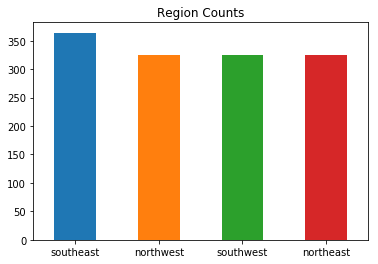

In [22]:
plt.title('Region Counts')
pd.value_counts(insurance['region']).plot.bar()
plt.xticks(rotation = 0)

There are an equal number of records from the Northwest, Northeast and Southwest, and slightly more records from the Southeast.

In [23]:
#Convert to numeric
insurance['south'] = 0
insurance.loc[insurance['region'].str.contains("south", na=False), 'south'] = 1
insurance['east'] = 0
insurance.loc[insurance['region'].str.contains("east", na=False), 'east'] = 1

#Delete original 'smoker' variable
insurance = insurance.drop('region', 1)

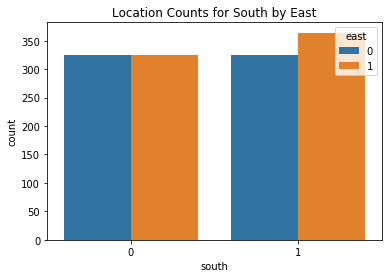

In [24]:
import seaborn as sns
plt.title('Location Counts for South by East')
sns.countplot(x='south', hue='east', data=insurance)

### Charges

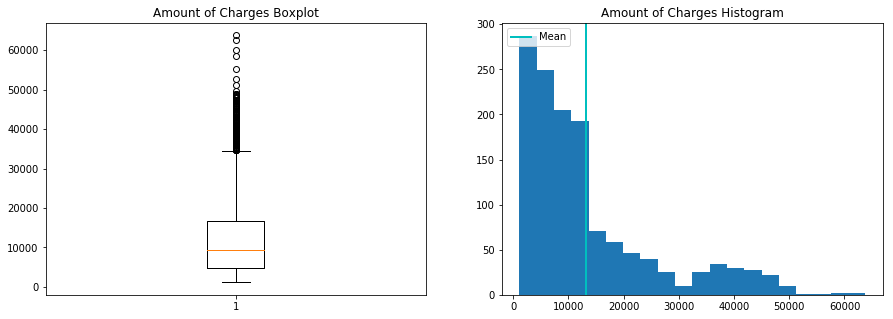

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['charges'].dropna(how = 'any'))
plt.title('Amount of Charges Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['charges'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['charges'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Amount of Charges Histogram')

plt.show()

Heavily left-skewed data with a mean of $13,270. Outliers range up to $63,770.

Let's try a log of the Charges variable to get a more normally distributed feature.

In [26]:
#create feature by taking log if insurance variable
insurance['charges_log'] = np.log(insurance['charges'])

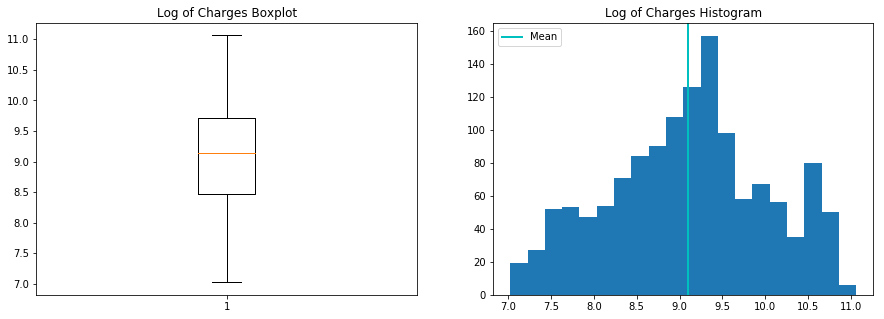

In [27]:
#visualize new feature
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['charges_log'].dropna(how = 'any'))
plt.title('Log of Charges Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['charges_log'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['charges_log'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Log of Charges Histogram')

plt.show()

That looks like a more useful feature - no more outliers and the distribution is much closer to normal

Let's also consider a binary variable the groups charges as above or below the mean

In [33]:
#Create binary charges variable based on mean
insurance['high_charge'] = 0
insurance.loc[insurance['charges'] > insurance['charges'].mean(), 'high_charge'] = 1

0    918
1    420
dtype: int64


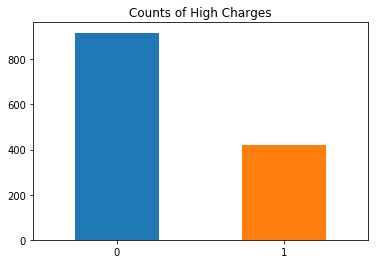

In [34]:
plt.title('Counts of High Charges')
pd.value_counts(insurance['high_charge']).plot.bar()
plt.xticks(rotation = 0)
print(pd.value_counts(insurance['high_charge'].values, sort=False))

### Recap Data

In [35]:
insurance.head()

,age,bmi,children,charges,male_gender,obesity,parent,smoke,south,east,charges_log,high_charge
0,19,27.900,0,16884.92400,0,0,0,1,1,0,9.734176,1
1,18,33.770,1,1725.55230,1,1,1,0,1,1,7.453302,0
2,28,33.000,3,4449.46200,1,1,1,0,1,1,8.400538,0
3,33,22.705,0,21984.47061,1,0,0,0,0,0,9.998092,1
4,32,28.880,0,3866.85520,1,0,0,0,0,0,8.260197,0


In [36]:
insurance.shape

(1338, 12)

In [37]:
insurance.describe()

,age,bmi,children,charges,male_gender,obesity,parent,smoke,south,east,charges_log,high_charge
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.526906,0.571001,0.204783,0.514948,0.514200,9.098659,0.313901
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.499462,0.495118,0.403694,0.499963,0.499985,0.919527,0.464250
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.022756,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.463853,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,9.146552,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,9.719558,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.063045,1.000000


## Models to predict Obesity

In [51]:
y = insurance['obesity']
X = insurance.drop('obesity', 1)

### Vanilla logistic regression

In [52]:
lr = LogisticRegression(C=1e9)
fit = lr.fit(X, y)

# Display results
pred_y_sklearn = lr.predict(X)
print('\n Accuracy by Obesity')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))


 Accuracy by Obesity
obesity    0    1
row_0            
0        606   22
1         27  683

 Percentage accuracy
0.9633781763826607


### Ridge logistic regression

   lambda_value  ridge_score
0             0     0.646204
1            10     0.646125
2            20     0.645961
3            30     0.645767
4            40     0.645565


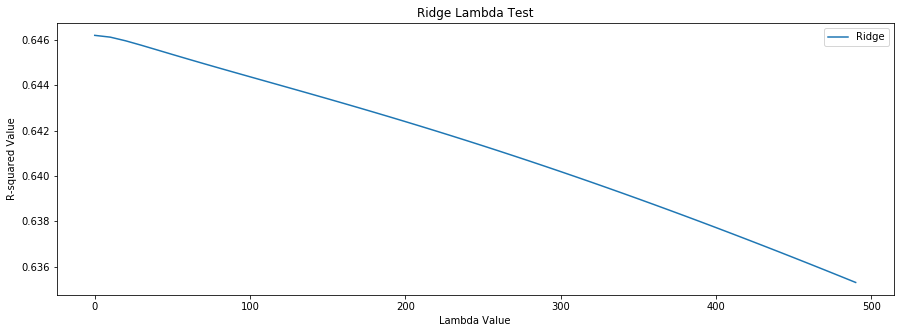

In [90]:
#Test max_features

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in ridge model
    ridgeregr = linear_model.Ridge(alpha=value, fit_intercept=False) 
    ridgeregr.fit(X, y)
    ridge_score = ridgeregr.score(X, y)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "ridge_score": [ridge_score]})
    return data

#Test large values for lamdba
appended_data = []
for i in [x * 10 for x in range(0, 50)]:
    result = lambda_test(i)
    appended_data.append(result)
r_results = pd.concat(appended_data, ignore_index=True)

print(r_results.head())

plt.figure(figsize=(15, 5))
plt.plot(r_results['lambda_value'], r_results['ridge_score'], label="Ridge")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')
plt.show()

In [87]:
ridgeregr = linear_model.Ridge(alpha=0.001, fit_intercept=False) 
ridgeregr.fit(X, y)

# Display results

print('\n Percentage accuracy')
print(ridgeregr.score(X, y))


 Percentage accuracy
0.6462039134509925


### Lasso logistic regression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


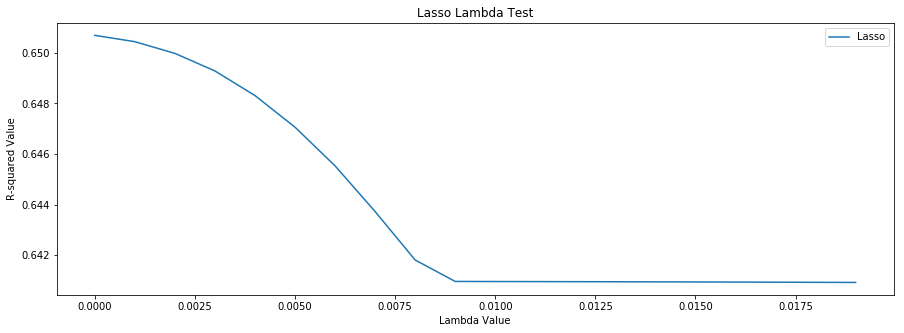

In [76]:
#Test lambda values

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in lasso model
    lass = linear_model.Lasso(alpha=value)
    lassfit = lass.fit(X, y)
    lass_score = lass.score(X, y)
    data = pd.DataFrame({"lambda_value": [value], "lass_score": [lass_score]})
    return data

#Test large values for lamdba
appended_data = []
for i in [x * 0.001 for x in range(0, 20)]:
    result = lambda_test(i)
    appended_data.append(result)
r_results = pd.concat(appended_data, ignore_index=True)

plt.figure(figsize=(15, 5))
plt.plot(r_results['lambda_value'], r_results['lass_score'], label="Lasso")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')
plt.show()

In [81]:
lass = linear_model.Lasso(alpha=0.001)
lassfit = lass.fit(X, y)

# Display results
print('\n Percentage accuracy')
print(lass.score(X, y))


 Percentage accuracy
0.6504339106339064


In [82]:
lass_score = cross_val_score(lass, X, y, cv=10)
print("Cross Validation Scores:\n", lass_score)
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (lass_score.mean(), lass_score.std() * 2))

Cross Validation Scores:
 [0.67737419 0.6589218  0.61953234 0.60432564 0.58465144 0.71762423
 0.62463808 0.65711276 0.60611655 0.67369924]

Cross Validation mean of: 0.64 (+/- 0.08)
